Importing common libraries

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

I will be importing the libraries as they will be required

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [3]:
cd /content/gdrive/My Drive/code

/content/gdrive/My Drive/code


In [4]:
ls

model/       train_model.ipynb  Untitled1.ipynb  Untitled3.ipynb
Reviews.csv  Untitled0.ipynb    Untitled2.ipynb


In [0]:
data = pd.read_csv('Reviews.csv')

In [0]:
df = data.copy()

In [7]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


Since we are doing Sentiment analysis, I will be taking Text and Score into consideration

In [0]:
df = df[['Text','Score']]

In [9]:
df.head()

,Text,Score
0,I have bought several of the Vitality canned d...,5
1,Product arrived labeled as Jumbo Salted Peanut...,1
2,This is a confection that has been around a fe...,4
3,If you are looking for the secret ingredient i...,2
4,Great taffy at a great price. There was a wid...,5


In [0]:
df['review'] = df['Text']
df['rating'] = df['Score']
df.drop(['Text','Score'], axis = 1, inplace = True)

In [11]:
df.head()

,review,rating
0,I have bought several of the Vitality canned d...,5
1,Product arrived labeled as Jumbo Salted Peanut...,1
2,This is a confection that has been around a fe...,4
3,If you are looking for the secret ingredient i...,2
4,Great taffy at a great price. There was a wid...,5


In [12]:
df.shape


(568454, 2)

Checking for the null values in the dataset

In [13]:
print(df['review'].isnull().sum())
print(df['rating'].isnull().sum())

0
0


Dropping duplicate values as they have no use except to reduce our model accuracy

In [0]:
df.drop_duplicates(subset=['rating','review'], keep = 'first',inplace = True)

In [15]:
df.shape

(393675, 2)

As you can see there is a fall in the dimension of the data hence we did have duplicate values

In [0]:
def rate(rating):
  if rating<3:
    return 0
  else:
    return 1
df['sentiment'] = df['rating'].apply(rate)      

In [17]:
df.head()

,review,rating,sentiment
0,I have bought several of the Vitality canned d...,5,1
1,Product arrived labeled as Jumbo Salted Peanut...,1,0
2,This is a confection that has been around a fe...,4,1
3,If you are looking for the secret ingredient i...,2,0
4,Great taffy at a great price. There was a wid...,5,1


In [0]:
df.drop('rating', axis =1, inplace = True)

In [19]:
df.head()

,review,sentiment
0,I have bought several of the Vitality canned d...,1
1,Product arrived labeled as Jumbo Salted Peanut...,0
2,This is a confection that has been around a fe...,1
3,If you are looking for the secret ingredient i...,0
4,Great taffy at a great price. There was a wid...,1


In [20]:
df['sentiment'].value_counts()

1    336591
0     57084
Name: sentiment, dtype: int64

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


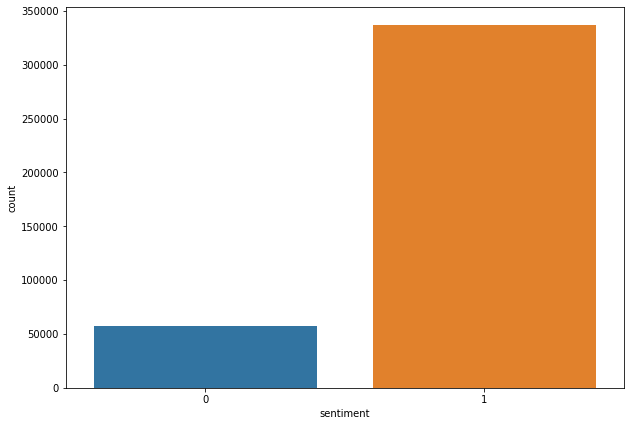

In [21]:
import seaborn as sns
plt.figure(figsize=(10,7))
sns.countplot(df['sentiment'])

There may be a case where people have used won't in place of will not , can't in place of can not therefore we can amend this using import re

In [0]:
import re
def decontract(rev):
  rev = re.sub(r"won\'t", "will not",rev)
  rev = re.sub(r"can\'t", "can not", rev)
  rev = re.sub(r"n\'t", "not",rev)
  rev = re.sub(r"\'re", " are", rev)
  rev = re.sub(r"\'s", " is", rev)
  rev = re.sub(r"\'d", " would", rev)
  rev = re.sub(r"\'ll", " will", rev)
  rev = re.sub(r"\'t", " not", rev)
  rev = re.sub(r"\'ve", " have", rev)
  rev = re.sub(r"\'m", " am", rev)
  return rev

In [23]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [0]:
le = WordNetLemmatizer()
stop_words = set(stopwords.words("english"))

In [0]:
from bs4 import BeautifulSoup # to remove html tags

In [0]:
def preprocess(review):
  review = re.sub(r"http\S+", "", review) # removing website links
  review = BeautifulSoup(review, 'lxml').get_text() # extracting data from html tags
  review = decontract(review)
  review = re.sub(r'\w*\d\w*', '', review).strip() # remove words with digits
  review = re.sub('[^A-Za-z]+', ' ', review)  # removing non word characters
  review = review.lower()
  review = [word for word in review.split(" ")if not word in stop_words]
  review = [le.lemmatize(token, "v") for token in review] #Lemmatization
  review = " ".join(review)
  review.strip()
  return review

In [0]:
df['review'] = df['review'].apply(preprocess)

In [28]:
df['review'].head()

0    buy several vitality can dog food products fin...
1    product arrive label jumbo salt peanuts peanut...
2    confection around centuries light pillowy citr...
3    look secret ingredient robitussin believe find...
4    great taffy great price wide assortment yummy ...
Name: review, dtype: object

In [0]:
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(df, test_size =0.2, random_state = 0)

In [30]:
print(train_df.shape)
print(test_df.shape)

(314940, 2)
(78735, 2)


In [31]:
import tensorflow as tf
print(tf.__version__)

2.2.0


In [0]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


In [46]:
max_length = 8000
max_rev_length = 130
tokenizer = Tokenizer(num_words = max_length , oov_token ="<OOV>")
tokenizer.fit_on_texts(train_df['review'])
word_index = tokenizer.word_index
print(len(word_index))
sequences = tokenizer.texts_to_sequences(train_df['review'])
X_train = pad_sequences(sequences, maxlen = max_rev_length, padding ='post')
Y_train = train_df['sentiment'] 

97968


In [47]:
embedding_dim = 32
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(97968, embedding_dim, input_length=max_rev_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 130, 32)           3134976   
_________________________________________________________________
bidirectional_2 (Bidirection (None, 64)                16640     
_________________________________________________________________
dense_6 (Dense)              (None, 6)                 390       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 7         
Total params: 3,152,013
Trainable params: 3,152,013
Non-trainable params: 0
_________________________________________________________________


In [48]:
model.fit(X_train,Y_train, epochs=3, batch_size=64, validation_split=0.2)

Epoch 1/3
3937/3937 [==============================] - 306s 78ms/step - loss: 0.2373 - accuracy: 0.9033 - val_loss: 0.2119 - val_accuracy: 0.9136
Epoch 2/3
3937/3937 [==============================] - 308s 78ms/step - loss: 0.1973 - accuracy: 0.9195 - val_loss: 0.2056 - val_accuracy: 0.9153
Epoch 3/3
3937/3937 [==============================] - 307s 78ms/step - loss: 0.1816 - accuracy: 0.9256 - val_loss: 0.2078 - val_accuracy: 0.9162


In [49]:
from sklearn.metrics import accuracy_score,f1_score, confusion_matrix
test_sequences = tokenizer.texts_to_sequences(test_df['review'])
X_test = pad_sequences(test_sequences, maxlen = max_rev_length, padding ='post')
Y_test = test_df['sentiment']
prediction = model.predict(X_test)
y_pred = (prediction > 0.5)
print("Accuracy of the model : ", accuracy_score(y_pred, Y_test))
print('F1-score: ', f1_score(y_pred, Y_test))
print('Confusion matrix:')
confusion_matrix(Y_test,y_pred) 

Accuracy of the model :  0.9164793293960755
F1-score:  0.9518114667604642
Confusion matrix:


array([[ 7215,  4280],
       [ 2296, 64944]])